In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../LAB 4/spam.csv', encoding='latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1, inplace = True)

In [4]:
df.rename(columns={'v1':'spam','v2':'mail'},inplace=True)
df

,spam,mail
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [5]:
df['spam'] = df['spam'].apply(lambda x : True if x=='spam' else False)

In [6]:
df['spam'].value_counts()

False    4825
True      747
Name: spam, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split
X = df['mail']
y = df['spam']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import *
# transform the text data to feature vectors that can be used as input to the Logistic regression
""""Convert a collection of raw documents to a matrix of TF-IDF features."""
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase='True')

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

# convert Y_train and Y_test values as integers

y_train = y_train.astype('int')
y_test = y_test.astype('int')

model = GaussianNB()

# training the Logistic Regression model with the training data
model.fit(X_train_features.toarray(), y_train.ravel())

GaussianNB()

In [9]:
prediction_on_training_data = model.predict(X_test_features.toarray())
accuracy_on_training_data = accuracy_score(y_test, prediction_on_training_data)
print(accuracy_on_training_data)
print(classification_report(y_test, prediction_on_training_data))

0.8863636363636364
              precision    recall  f1-score   support

           0       0.98      0.88      0.93      1453
           1       0.54      0.90      0.67       219

    accuracy                           0.89      1672
   macro avg       0.76      0.89      0.80      1672
weighted avg       0.93      0.89      0.90      1672



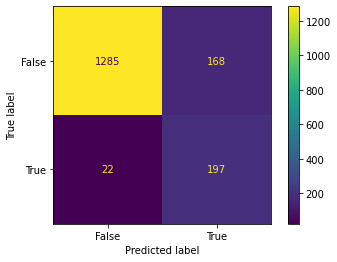

In [10]:
cnf = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, prediction_on_training_data),display_labels=[False,True])
cnf.plot()
plt.show()